In [1]:
#importing libraries
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook 
import matplotlib.pyplot as plt
from os.path import isfile, join

In [2]:
#reading video frames from a video and aking progress bars
col_frames = os.listdir('frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
col_images=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread('frames/'+i)
    col_images.append(img)

/tmp/ipykernel_28409/1068733543.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(col_frames):


  0%|          | 0/2891 [00:00<?, ?it/s]

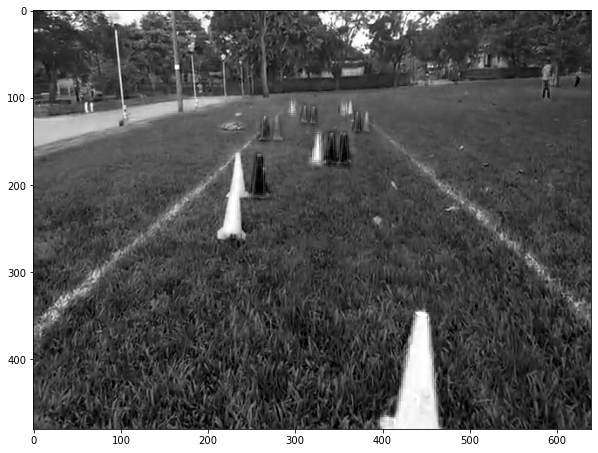

In [3]:
#plotting frames
idx = 457
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

In [4]:
#creating frame mask and specifying coordinates of polygon
stencil = np.zeros_like(col_images[idx][:,:,0])
polygon = np.array([[50,270], [220,160], [360,160], [480,270]])
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

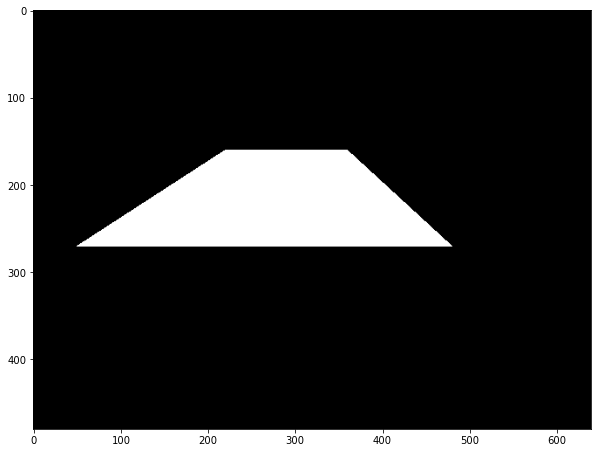

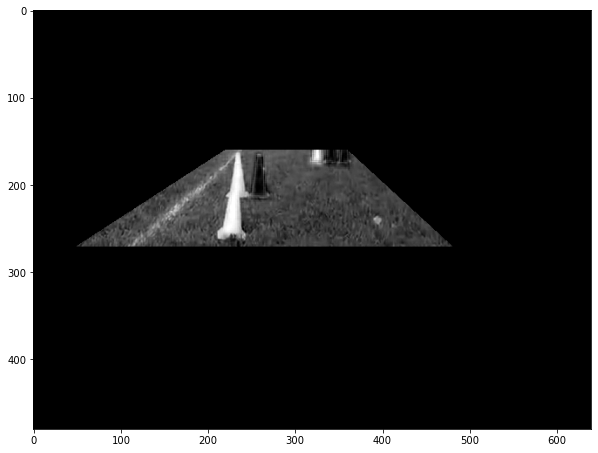

In [5]:
#plotting polygon and applying a mask on it
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

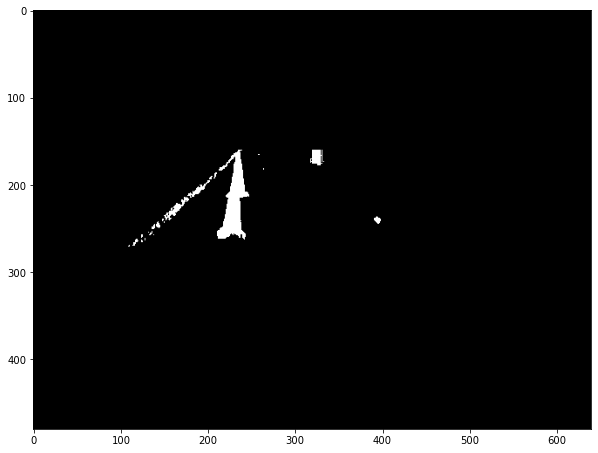

In [6]:
#Thresholding the image
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

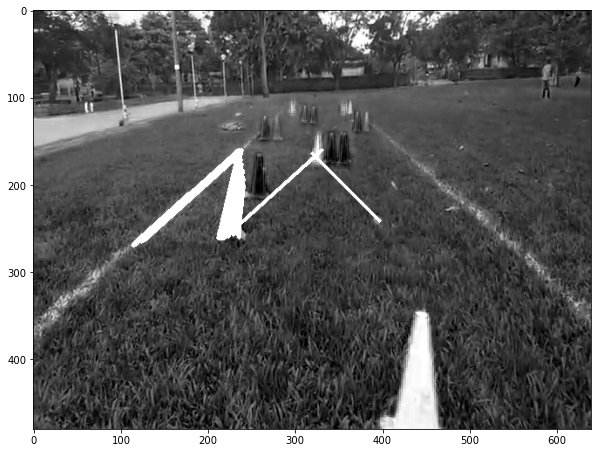

In [7]:
#appyling hough line transform
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
dmy = col_images[idx][:,:,0].copy()
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [8]:
#applying on everyframe and saving them in a new directory

cnt = 0

for img in tqdm_notebook(col_images):
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)  
    cv2.imwrite('detected/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('detected/'+str(cnt)+'.png',img)

  cnt+= 1

/tmp/ipykernel_28409/1584034828.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img in tqdm_notebook(col_images):


  0%|          | 0/2891 [00:00<?, ?it/s]

In [9]:
#preparing video output
pathIn= 'detected/'
pathOut = 'roads_v2.mp4'
fps = 30.0
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))
frame_list = []
for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    frame_list.append(img)

out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_list)):
    out.write(frame_list[i])

out.release()

/tmp/ipykernel_28409/2071656907.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(files))):


  0%|          | 0/2892 [00:00<?, ?it/s]

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
